/Users/paullucaci/Desktop/P20
/Users/paullucaci/Desktop/P20/DeepSarsa


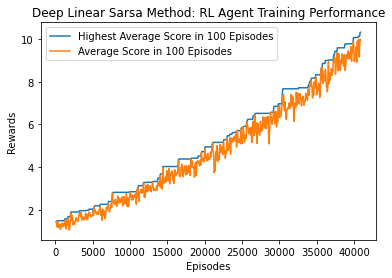

,episode,frame,highest_score,rolling_reward
40400,40400,12651639,10.07,9.90
40450,40450,12675821,10.09,9.88
40500,40500,12700388,10.09,9.54
40550,40550,12726213,10.09,9.91
40600,40600,12750624,10.13,9.99
40650,40650,12773546,10.13,9.16
40700,40700,12798259,10.13,9.27
40750,40750,12822815,10.17,9.85
40800,40800,12848102,10.32,10.00
40850,40850,12872724,10.32,9.94


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

import matplotlib.pyplot as plt
import pandas as pd

%cd /content/drive/MyDrive/P20/
from notebook_plotter import training_plots

%cd /content/drive/MyDrive/P20/DeepSarsa/
metrics_filename='./metrics/torch-linear-deepsarsa-metrics_breakout.pkl'

training_plots(metrics_filename=metrics_filename, title="Deep Linear Sarsa Method: RL Agent Training Performance").tail(10)

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/P20/DeepSarsa/

!pip install baselines --no-deps
!pip install gym["atari"]
!python -m atari_py.import_roms "./Atari-Roms"

import sys, os

You should consider upgrading via the '/Users/paullucaci/miniforge3/envs/dev/bin/python3.9 -m pip install --upgrade pip' command.
zsh:1: no matches found: gym[atari]
copying adventure.bin from ROMS/Adventure (1980) (Atari, Warren Robinett) (CX2613, CX2613P) (PAL).bin to /Users/paullucaci/miniforge3/envs/dev/lib/python3.9/site-packages/atari_py/atari_roms/adventure.bin
copying air_raid.bin from ROMS/Air Raid (Men-A-Vision) (PAL) ~.bin to /Users/paullucaci/miniforge3/envs/dev/lib/python3.9/site-packages/atari_py/atari_roms/air_raid.bin
copying alien.bin from ROMS/Alien (1982) (20th Century Fox Video Games, Douglas 'Dallas North' Neubauer) (11006) ~.bin to /Users/paullucaci/miniforge3/envs/dev/lib/python3.9/site-packages/atari_py/atari_roms/alien.bin
copying amidar.bin from ROMS/Amidar (1982) (Parker Brothers, Ed Temple) (PB5310) ~.bin to /Users/paullucaci/miniforge3/envs/dev/lib/python3.9/site-packages/atari_py/atari_roms/amidar.bin
copying assault.bin from ROMS/Assault (AKA Sky Alien) (

copying mr_do.bin from ROMS/Mr. Do! (1983) (CBS Electronics, Ed English) (4L4478) (PAL).bin to /Users/paullucaci/miniforge3/envs/dev/lib/python3.9/site-packages/atari_py/atari_roms/mr_do.bin
copying ms_pacman.bin from ROMS/Ms. Pac-Man (1983) (Atari - GCC, Mark Ackerman, Glenn Parker) (CX2675) ~.bin to /Users/paullucaci/miniforge3/envs/dev/lib/python3.9/site-packages/atari_py/atari_roms/ms_pacman.bin
copying name_this_game.bin from ROMS/Name This Game (Guardians of Treasure) (1983) (U.S. Games Corporation - JWDA, Roger Booth, Sylvia Day, Ron Dubren, Todd Marshall, Robin McDaniel, Wes Trager, Henry Will IV) (VC1007) ~.bin to /Users/paullucaci/miniforge3/envs/dev/lib/python3.9/site-packages/atari_py/atari_roms/name_this_game.bin
copying pacman.bin from ROMS/Pac-Man (1982) (Atari, Tod Frye) (CX2646) (PAL).bin to /Users/paullucaci/miniforge3/envs/dev/lib/python3.9/site-packages/atari_py/atari_roms/pacman.bin
copying phoenix.bin from ROMS/Phoenix (1983) (Atari - GCC, Mike Feinstein, John Mra

In [ ]:
import torch
import torch.nn as nn

%cd /content/drive/MyDrive/P20/DeepSarsa/

from p20 import training_p20
from baselines.common.atari_wrappers import make_atari, wrap_deepmind
import gym

global device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Adapted from https://github.com/mila-iqia/atari-representation-learning/blob/08165740a7688853c6315751003aa4dee9901073/README.md#L125
class BaseEncoder(nn.Module):
    # Network defined by the Deepmind paper (Mnih, et al., 2015)
    ## Modified variant
    def __init__(self, num_actions=4):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(4, 32, 8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, stride=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(in_features=3136, out_features=512),
            nn.Linear(in_features=512, out_features=num_actions)
        )

    def forward(self, inputs):
        x = self.cnn(inputs)
        x = x.view(x.size(0), -1)
        return x

def main(game_name, seed):

    env = wrap_deepmind(make_atari(game_name), episode_life=False, frame_stack=True, scale=True)
    env.seed(seed)

    p20_model = BaseEncoder(env.action_space.n).to(device)
    p20_model.train()

    training_p20(env=env, seed=seed, solved_at=40, p20_model=p20_model,
                    max_episodes=60000, lr=0.00025, gamma=0.99, max_epsilon=1, min_epsilon=0.1, render=False,
                    metrics_filename='./metrics/torch-linear-deepsarsa-metrics_breakout.pkl',
                    checkpoint_filename='./checkpoints/torch-linear-deepsarsa-checkpoint_breakout.pkl',
                    theta_filename='torch-linear-deepsarsa_breakout.pt')

if __name__ == "__main__":
    main(game_name="BreakoutNoFrameskip-v4", seed=42)

/data/workspace_files/DeepSarsa

Using previously collected metrics during training:
                     100       150       200       250       300       350  \
episode           100.00    150.00    200.00    250.00    300.00    350.00   
frame           19033.00  28055.00  36957.00  46468.00  56042.00  64838.00   
highest_score       1.43      1.47      1.47      1.47      1.49      1.49   
rolling_reward      1.43      1.38      1.21      1.29      1.45      1.26   

                     400       450       500        550  ...        38500  \
episode           400.00    450.00    500.00     550.00  ...     38500.00   
frame           74136.00  83203.00  92043.00  101601.00  ...  11751912.00   
highest_score       1.49      1.49      1.49       1.49  ...         9.59   
rolling_reward      1.17      1.25      1.19       1.31  ...         9.18   

                      38550        38600        38650        38700  \
episode            38550.00     38600.00     38650.00     38700.00  

KeyboardInterrupt: KeyboardInterrupt: 

In [ ]:
while True: pass